<a href="https://colab.research.google.com/github/maicon-reis/data-science-projects/blob/main/Olist_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Projeto do site de e-commerce brasileiro O-list.**

Objetivos:
* Identificar graficamente os dez estados com maior números de pedidos, e exibir graficamente em forma percentual;
* Identificar os cinco grupos de produtos mais vendidos;
* Identificar quais os meses do ano têm mais pedidos e quais tem menos pedidos;



In [3]:
# importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##**1 - Identificar graficamente os dez estados com maior número de pedidos, e exibir graficamente**

Inicialmente, vamos estruturar a análise dos pedidos por estado. Verificar quais os estados que mais realizaram pedidos e plotar o resultado em um gráfico de barras representativo dos dez estados com maior número de pontos pedidos.

In [4]:
# importando a base de dados de geolocaliação dos pedidos
df_geoloc = pd.read_csv('https://www.dropbox.com/s/f5vj45ex5vuspmw/olist_geolocation_dataset.csv?dl=1')

Verificando a estrutura do dataset.

In [5]:
# visualizando os cinco primeiros índices do dataframe
df_geoloc.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
# Visualizando quantidade de linhas e colunas
df_geoloc.shape

(1000163, 5)

In [7]:
# obtendo uma visão geral do dataframe
df_geoloc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [8]:
# Verificando a quantidade de valores nulos por série
df_geoloc.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Como pode ser verificado não há valores nulos, dessa forma o passo seguinte é contabilizar os pontos de geolocalização por estado.

In [89]:
df_geoloc['geolocation_state'].value_counts()

SP    404268
MG    126336
RJ    121169
RS     61851
PR     57859
SC     38328
BA     36045
GO     20139
ES     16748
PE     16432
DF     12986
MT     12031
CE     11674
PA     10853
MS     10431
MA      7853
PB      5538
RN      5041
PI      4549
AL      4183
TO      3576
SE      3563
RO      3478
AM      2432
AC      1301
AP       853
RR       646
Name: geolocation_state, dtype: int64

Como visto mais a cima, o total de porntos de geolocalização é igual ao número de linhas, já que não houve dados nulos. Dessa forma, para se obter os valores percentuais por estado, basta dividir o valor resultante do cálculo anterior pelo valor total de linhas, ou seja, o item 0 resultante da função shape.

In [ ]:
# obtendo o total de pontos de geolocalização
total = df_geoloc.shape[0]

In [ ]:
# Obtendo os valores percentuais por estado
v_perc = df_geoloc.geolocation_state.value_counts(ascending=True) / total * 100

In [ ]:
# verificando os dez maiores estados e estabelecendo valores percentuais 
labels = v_perc.tail(10).apply(lambda x: round(x, 1)).index
v_perc_10 = v_perc.tail(10).apply(lambda x: round(x, 1))

Na próximo trecho de código serão realizadas as configurações gerais para a exibição gráfica do resultado encontrado.

[]

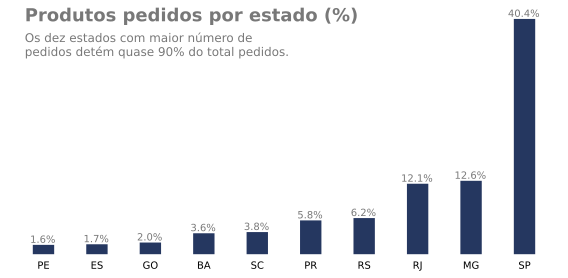

In [ ]:
# Configurando o comprimento dos labels e a largura das barras
x = np.arange(len(labels))
width_bar = 0.4

# configurando a visualização
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# configurando a fonte
plt.rcParams['font.family'] = 'sans-serif'

# criando fig e axes
fig, ax = plt.subplots(figsize=(8, 4))

# plotando gráfico de barras de vendas por estado
rect = ax.bar(x=labels, height=v_perc_10, width=width_bar, color='#253760')

# removendo as bordas do gráfico
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# removendo os rótulos do eixo y
plt.gca().axes.get_yaxis().set_visible(False)

# removendo os xticks do gráfico
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    labelbottom=True
)

# criando a função para inserir labels
def autolabel(rects):
  for rect in rects:
    height=rect.get_height()
    ax.annotate(
        '{}%'.format(height),
        xy=(rect.get_x(), height),
        xytext=(10,0),
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontsize=10,
        color='#787878',
    )

# plotando título
plt.text(-0.35, 40,
    "Produtos pedidos por estado (%)",
    fontsize=18,
    weight='bold',
    color='#787878'
)

# plotando subtitulo
plt.text(-0.35, 38,
         "Os dez estados com maior número de\n"
         "pedidos detém quase 90% do total pedidos.",
         va="top",
         fontsize=12,
         color='#787878')

# plotando labels
autolabel(rect)

# Plotando o gráfico
plt.tight_layout()
plt.plot()

De forma complementar plotaremos a distribuição geográfica dos pedidos no mapa, tanto para podermos visualizar melhor a proporção de São Paulo para em relação aos demais estados, como para compreendermos de forma global a distribuição geográfica dos pedidos.


In [154]:
# Transformando em dicionário a quantidade de pontos georefereciados por estado
dict_geo = dict(df_geoloc['geolocation_state'].value_counts())
dict_pot = dict((df_geoloc['geolocation_state'].value_counts() * 150) / df_geoloc.shape[0])

In [155]:
# Organizando as informações para plotar no mapa
estados = ['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Rio Grande do Sul', 'Paraná', 'Santa Catarina',
           'Bahia', 'Goiás', 'Espirito Santo', 'Pernambuco', 'Distrito Federal', 'Mato Grosso', 'Ceará',
           'Pará', 'Mato Grosso do Sul', 'Maranhão', 'Paraíba', 'Rio Grande do Norte', 'Piauí', 'Alagoas',
           'Tocantins', 'Sergipe', 'Rondônia', 'Amazonas', 'Acre', 'Amapá', 'Roraima']
valores = list(dict_geo.values())
coordenadas = [(-23.5489, -46.6315), (-19.9217, -43.9398), (-22.8977, -43.2037), (-30.0786, -51.0315), (-25.4234, -49.2737),
               (-27.5862, -48.5376), (-12.9778, -38.5071), (-16.6783, -49.2558), (-20.3343, -40.2924), (-8.0538, -34.8802),
               (-15.7843, -47.9251), (-15.5953, -56.0934), (-3.7217, -38.5400), (-1.4583,  -48.5019), (-20.4425, -54.6419),
               (-2.5343, -44.3024), (-7.1172, -34.8569), (-5.7909, -35.2112), (-5.0937, -42.8000),(-9.6766, -35.7220),
               (-10.2068, -48.3591), (-10.9102, -37.0734), (-8.7602, -63.8910), (-3.0966, -59.9634), (-9.9905, -67.7966),
               (0.0439, -51.0645), (2.8223, -60.6665)]
pot = list(dict_pot.values())

27

In [156]:
# Baixando a biblioteca para geração do gráfico
!pip install -q folium

In [165]:
# Importando a biblioteca folium
from folium import Map, Marker, CircleMarker

# Renderizando a visão geral do mapa
mapa = Map(location=[-17.6021, -49.8779],
           tiles="Stamen Terrain",
           zoom_start=5)

# Plotando os Pontos no mapa com as informações
for i in range(len(estados)):
  '''Adiciona o ponto de localização no mapa com a informações do estado e
  da quantidade de pedidos.'''
  Marker([coordenadas[i][0], coordenadas[i][1]],
         popup=f'<i><p>{estados[i]}</i>',
         tooltip= f'Pedidos: {valores[i]}').add_to(mapa)
  
  '''Adiciona o círculo contendo a projeção proporcional da quantidade de 
  pedidos por estado.'''
  CircleMarker(
      location=[coordenadas[i][0], coordenadas[i][1]],
      radius=pot[i],
      color='#FFFF00',
      fill=True,
 
# Exibindo o mapa com os pontos
mapa

##**2 - Identificar os cinco grupos de produtos mais vendidos**

Após obtermos o resultado gráfico dos estados que mais realizaram pedidos, podemos dar andamento ao estudo com objetivo de verificar quais os produtos ou grupos de produtos mais pedidos.

In [ ]:
# Importando os conjuntos de dados referentes a
df_data_pedidos = pd.read_csv('https://github.com/maicon-reis/data-science-projects/blob/main/olist_orders_dataset.csv?raw=true')
df_info_produtos = pd.read_csv('https://github.com/maicon-reis/data-science-projects/blob/main/olist_products_dataset.csv?raw=true')
df_itens_pedidos = pd.read_csv('https://github.com/maicon-reis/data-science-projects/blob/main/olist_order_items_dataset.csv?raw=true')

In [ ]:
# Verificando o data frame Data do Pedido
df_data_pedidos.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
# Verificando o data frame Ítens Pedidos
df_itens_pedidos.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
df_info_produtos.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Vefica-se, no data frame Data Pedidos, que entre os pedidos estão os entregues, enviados e ainda não entregues, cancelados, indisponíveis, faturados, em processamento, criados e aprovados. Como nosso objetivo é verificar quais os produtos, ou grupos de produtos são mais requisitados, não nos ateremos ao status do pedido, tomando todos globalmente, dessa forma a data que será utilizada é a data de compra do pedido.

In [ ]:
'''Unindo os data frames Data Pedidos e Ítens Pedidos dando origem ao data frame 
Total Pedidos'''
df_total_pedidos = pd.merge(df_data_pedidos, df_itens_pedidos, on='order_id')

In [ ]:
'''Unindo o data frame recém criado Total Pedidos ao Info Produtos dando origem
agora ao data frame Produtos Pedidos'''
df_produtos_pedidos = pd.merge(df_total_pedidos, df_info_produtos, on='product_id')

In [ ]:
df_produtos_pedidos.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0


In [ ]:
df_produtos_pedidos = df_produtos_pedidos[["product_id",
                                           "product_category_name",
                                           "order_purchase_timestamp"]]

In [ ]:
# Obtendo uma visão geral do data frame Produtos Pedidos
df_produtos_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 3 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   product_id                112650 non-null  object
 1   product_category_name     111047 non-null  object
 2   order_purchase_timestamp  112650 non-null  object
dtypes: object(3)
memory usage: 3.4+ MB


In [ ]:
df_produtos_pedidos.shape

(112650, 3)

In [ ]:
# Verificando a quantidade ítens nulos
df_produtos_pedidos.isnull().sum()

product_id                     0
product_category_name       1603
order_purchase_timestamp       0
dtype: int64

Percebe-se que a quantidade de dados nulos na série correspondentes ao nome da categoria do produto é de 1603, equivalente a 1,4% do total. Dessa forma, essas linhas serão removidas do data frame.

In [ ]:
# Removendo as linhas com ítens faltantes
df_produtos_pedidos =df_produtos_pedidos.dropna(axis=0)

A partir deste momento partiremos para manipulação dos dados propriamente dita, e ao final será gerado um gráfico com barras horizontais.

In [ ]:
# Verificando a quantidade de grupos de produtos
qtd_produtos = len(df_produtos_pedidos['product_category_name'].unique())
print(f'Existem {qtd_produtos} tipos de grupos de produtos.')

Existem 73 tipos de grupos de produtos.


In [ ]:
# Verificando quais as 10 categorias de produtos mais pedidas
df_produtos_pedidos['product_category_name'].value_counts().sort_values().tail(10)

automotivo                 4235
ferramentas_jardim         4347
telefonia                  4545
relogios_presentes         5991
utilidades_domesticas      6964
informatica_acessorios     7827
moveis_decoracao           8334
esporte_lazer              8641
beleza_saude               9670
cama_mesa_banho           11115
Name: product_category_name, dtype: int64

Observa-se que as categorias de produtos mais pedidas no site analizado são os referentes a cama, mesa e banho, seguido dos da categoria beleza e saúde e esporte e lazer. A partir dessa informação vamos partir para a parte gráfica.

In [ ]:
# Realizando modificações na série 'product_category_name' para torná-la mais agradável
df_produtos_pedidos['product_category_name'] = df_produtos_pedidos['product_category_name'].apply(
    lambda x: 
    str(x).replace("_", " ").title())

In [ ]:
# Obtendo as informações que serão utilizados para plotar o gráfico
produtos = df_produtos_pedidos['product_category_name'].value_counts().sort_values().tail(10).index
width = df_produtos_pedidos['product_category_name'].value_counts().sort_values().tail(10)

[]

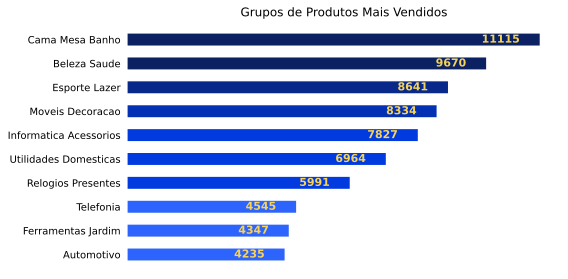

In [ ]:
# Configurando o comprimento dos labels e a largura das barras
pos = np.arange(len(produtos))

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Configurando as fontes
plt.rcParams['font.family'] = 'sans-serif'

# Configurando as cores
CORES = ["#2E64FE", "#2E64FE", "#2E64FE", "#013ADF", "#013ADF", "#013ADF", "#0431B4", "#08298A", "#0B2161", "#0B2161"]

# Criando Fix e Axex
fig, ax = plt.subplots(figsize=(8, 4))

# Plotando o gráfico de barras horizontais
rect = ax.barh(pos,
               width=width,
               align='center',
               height=0.5,
               tick_label=produtos,
               color = CORES)

# removendo as bordas do gráfico
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Removendo os labels do eixo x
plt.gca().axes.get_xaxis().set_visible(False)

# Removendo os yticks
plt.tick_params(
    axis='both',
    which='both',
    left=False,
    top=False,
    labelbottom=True,
)

# Criando função para inserir labels
def autolabel(rects):
  rect_labels = []
  for rect in rects:
    width = int(rect.get_width())
    yloc = rect.get_y() + rect.get_height() / 2
    label = ax.annotate(
        width,
        xy=(width, yloc),
        xytext=(-20, 0),
        textcoords="offset points",
        horizontalalignment='right',
        verticalalignment='center',
        color = '#F7D358',
        weight='bold',
        size=11,
        clip_on=True
    )
    rect_labels.append(label)

# plotando os labels
autolabel(rect)

# Plotando o gráfico
plt.title("Grupos de Produtos Mais Vendidos")
plt.tight_layout()
plt.plot()

##**3 - Identificar quais os meses do ano têm mais pedidos e quais tem menos pedidos**

Para essa análise ainda iremos utilizar do data frame df_produtos_pedidos, e para verificarmos quais os meses do ano são realizados o maior e o menor número de pedidos. Como esse data frame já está tratado, partiremos diretamente para a análise dos dados.

In [ ]:
# Verificando a estrutura do data frame
df_produtos_pedidos.head()

,product_id,product_category_name,order_purchase_timestamp
0,87285b34884572647811a353c7ac498a,Utilidades Domesticas,2017-10-02 10:56:33
1,87285b34884572647811a353c7ac498a,Utilidades Domesticas,2017-08-15 18:29:31
2,87285b34884572647811a353c7ac498a,Utilidades Domesticas,2017-08-02 18:24:47
3,87285b34884572647811a353c7ac498a,Utilidades Domesticas,2017-10-23 23:26:46
4,595fac2a385ac33a80bd5114aec74eb8,Perfumaria,2018-07-24 20:41:37


In [ ]:
# Formatando a data para extrair somente a data no formato YYYY-MM-DD
df_produtos_pedidos['order_purchase_timestamp'] = pd.to_datetime(df_produtos_pedidos['order_purchase_timestamp'], format='%Y-%m-%d').dt.date

In [ ]:
# Criando uma nova série com o inteiro referente ao mês do ano
df_produtos_pedidos['Mês'] = pd.to_datetime(df_produtos_pedidos['order_purchase_timestamp']).dt.month

In [ ]:
valores = df_produtos_pedidos['Mês'].value_counts(sort=False)

Sabendo que o número inteiro que está como índice representa os meses do ano, portanto o 1 representa janeiro e o 12 dezembro, verifica-se que o mês de agosto é o mês com o maior número de pedidos e o mês de setembro, com o menor número de pedidos. Dessa forma, vamos colocar essa informação de forma gráfica.

In [ ]:
# Cria uma lista contendo os meses do ano
meses = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun",
        "Jul", "Ago", "Set", "Out", "Nov", "Dez"]

[]

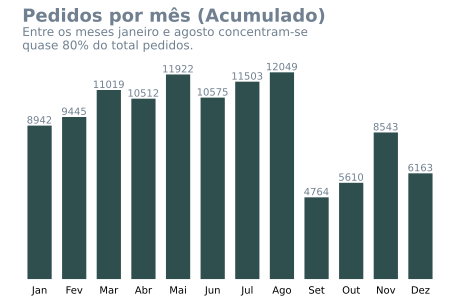

In [ ]:
# Configurando o comprimento dos labels e a largura das barras
x = np.arange(len(meses))
width_bars = 0.7

# configurando a visualização
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# configurando a fonte
plt.rcParams['font.family'] = 'sans-serif'

# criando fig e axes
fig, ax = plt.subplots(figsize=(8, 4))

# plotando gráfico de barras de vendas por estado
rect = ax.bar(x=meses, height=valores, width=width_bars, color='#2F4F4F')

# removendo as bordas do gráfico
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# removendo os rótulos do eixo y
plt.gca().axes.get_yaxis().set_visible(False)

# removendo os xticks do gráfico
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    labelbottom=True
)

# criando a função para inserir labels
def autolabel(rects):
  for rect in rects:
    height=rect.get_height()
    ax.annotate(
        '{}'.format(height),
        xy=(rect.get_x(), height),
        xytext=(12,0),
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontsize=10,
        color='#708090',
    )

# plotando título
plt.text(-0.5, 15000,
    "Pedidos por mês (Acumulado)",
    fontsize=18,
    weight='bold',
    color='#708090'
)

# plotando subtitulo
plt.text(-0.5, 14700,
         "Entre os meses janeiro e agosto concentram-se\n"
         "quase 80% do total pedidos.",
         va="top",
         fontsize=12,
         color='#708090')

# plotando labels
autolabel(rect)

# Plotando o gráfico
plt.plot()